In [1]:
# Wrangling
import pandas as pd
import numpy as np
import os

# # import wrangle.py
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Models
from sklearn.cluster import KMeans

# Custom modules
import util

# Custom notebook settings for max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Acquire

In [2]:
# Read csv file into pandas DataFrame.
file = "/Users/ultimate/codeup-data-science/pet_projects/2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx"
df = pd.read_excel(file)
df

,FNDDS Nutrient Values\n2017-2018 Food and Nutrient Database for Dietary Studies - At A Glance,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Folic acid (mcg),"Folate, food (mcg)","Folate, DFE (mcg_DFE)","Folate, total (mcg)","Choline, total (mg)",Vitamin B-12 (mcg),"Vitamin B-12, added\n(mcg)",Vitamin C (mg),Vitamin D (D2 + D3) (mcg),Vitamin E (alpha-tocopherol) (mg),"Vitamin E, added\n(mg)",Vitamin K (phylloquinone) (mcg),Calcium (mg),Phosphorus (mg),Magnesium (mg),Iron\n(mg),Zinc\n(mg),Copper (mg),Selenium (mcg),Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
1,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0,4.38,2.009,1.658,0.497,14,60,61,0,7,0,0,0,0.014,0.036,0.177,0.011,0,5,5,5,16,0.05,0,5,0.1,0.08,0,0.3,32,14,3,0.03,0.17,0.052,1.8,51,17,0,0,0,0,0,0,0.063,0.256,0.321,0.919,0.293,0.129,1.475,0.04,0,0.374,0.052,0,0.026,0,0,0,87.5
2,11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0,1.99,1.164,0.426,0.065,8,58,59,0,4,0,0,0,0.057,0.137,0.11,0.06,0,1,1,1,17.9,0.56,0,0.1,1.1,0.03,0,0.2,126,103,12,0,0.42,0.001,1.9,157,39,0,0,0,0.043,0.033,0.022,0.052,0.06,0.19,0.537,0.194,0.03,0.433,0.002,0,0.069,0.007,0,0.003,0,0.001,0,89.04
3,11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0,3.2,1.86,0.688,0.108,12,31,32,0,7,0,0,0,0.056,0.138,0.105,0.061,0,0,0,0,17.8,0.54,0,0,1.1,0.05,0,0.3,123,101,12,0,0.41,0.001,1.9,150,38,0,0,0,0.067,0.054,0.034,0.084,0.097,0.303,0.857,0.309,0.047,0.694,0.004,0,0.115,0.012,0,0.004,0.001,0.002,0,88.1
4,11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.1,4.46,4.46,0,3.46,2.154,0.999,0.128,14,28,29,0,7,0,0,0,0.02,0.105,0.043,0.034,0,5,5,5,16,0.36,0,0.9,1.3,0.08,0,0.3,101,86,5,0.05,0.38,0.01,2,253,3,0,0,0,0.112,0.066,0.039,0.087,0.097,0.348,0.91,0.419,0.077,0.87,0,0,0.078,0.05,0,0,0,0,0,88.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079,99997802,Tomatoes as ingredient in omelet,9999,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,0.038,0.035,0.094,0,0,43,103,464,0,2597,142,0.045,0.024,0.637,0.104,0,14,14,14,7.4,0,0,18.2,0,0.6,0,8.8,14,30,13,0.33,0.21,0.071,0.1,278,6,0,0,0,0,0,0,0,0,0,0.028,0.009,0.001,0.034,0,0,0.089,0.004,0,0,0,0,0,92.57
7080,99997804,Other vegetables as ingredient in omelet,9999,Not included in a food

In [3]:
def first_row_to_col_header(df):

    # Assign row as column headers
    df.columns = df.iloc[0]

    # Using DataFrame.rename()
    df1 = df.rename(columns=df.iloc[1])

    # Convert row to header and remove the row
    df1 = df.rename(columns=df.iloc[0]).loc[1:]

    # Using DataFrame.rename() to convert row to column header
    df.rename(columns=df.iloc[1], inplace = True)

    # Using DataFrame.values[]
    header_row = df.iloc[0]
    df1 = pd.DataFrame(df.values[1:], columns=header_row)
    return df1

In [4]:
df = first_row_to_col_header(df)

# Prepare

In [5]:
df.describe()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Folic acid (mcg),"Folate, food (mcg)","Folate, DFE (mcg_DFE)","Folate, total (mcg)","Choline, total (mg)",Vitamin B-12 (mcg),"Vitamin B-12, added\n(mcg)",Vitamin C (mg),Vitamin D (D2 + D3) (mcg),Vitamin E (alpha-tocopherol) (mg),"Vitamin E, added\n(mg)",Vitamin K (phylloquinone) (mcg),Calcium (mg),Phosphorus (mg),Magnesium (mg),Iron\n(mg),Zinc\n(mg),Copper (mg),Selenium (mcg),Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
count,7083,7083,7083,7083,7083,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083,7083,7083,7083,7083,7083,7083,7083,7083.0,7083.0,7083.0,7083.0,7083,7083,7083,7083,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083,7083,7083,7083.0,7083.00,7083.0,7083.0,7083,7083,7083,7083,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0,7083.0
unique,7083,7083,167,167,608,2107.0,3113.0,1788.0,160.0,2100.0,3474.0,3623.0,3072.0,274,374,496,362,871,121,677,735,666.0,634.0,3317.0,712.0,201,178,320,260,1108.0,453.0,141.0,453.0,134.0,511.0,115.0,630.0,407,517,219,621.0,559.00,595.0,539.0,670,1028,60,151,55.0,390.0,293.0,319.0,432.0,569.0,986.0,2791.0,1825.0,704.0,3517.0,339.0,129.0,2869.0,824.0,106.0,198.0,235.0,132.0,280.0,3884.0
top,11000000,"Milk, human",2402,Fish,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0,21,0.0,0.01,0.0,0.0,70,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
freq,1,1,340,340,101,202.0,430.0,663.0,1642.0,228.0,322.0,336.0,300.0,2443,2650,1411,5180,2283,5011,6033,2235,217.0,169.0,165.0,267.0,4234,642,422,423,190.0,2290.0,6621.0,2347.0,3675.0,382.0,6758.0,737.0,164,126,262,168.0,108.00,116.0,253.0,57,94,6590,6708,6982.0,3975.0,4208.0,3516.0,2566.0,2060.0,934.0,326.0,448.0,840.0,366.0,1794.0,5377.0,306.0,498.0,6176.0,3025.0,4890.0,4505.0,4914.0,25.0


In [6]:
util.metrics(df)

There are 7083 rows and 69 columns in this dataframe.
Plus the following nulls:
0
Food code                                 0
Main food description                     0
WWEIA Category number                     0
WWEIA Category description                0
Energy (kcal)                             0
Protein (g)                               0
Carbohydrate (g)                          0
Sugars, total\n(g)                        0
Fiber, total dietary (g)                  0
Total Fat (g)                             0
Fatty acids, total saturated (g)          0
Fatty acids, total monounsaturated (g)    0
Fatty acids, total polyunsaturated (g)    0
Cholesterol (mg)                          0
Retinol (mcg)                             0
Vitamin A, RAE (mcg_RAE)                  0
Carotene, alpha (mcg)                     0
Carotene, beta (mcg)                      0
Cryptoxanthin, beta (mcg)                 0
Lycopene (mcg)                            0
Lutein + zeaxanthin (mcg)             

,count,unique,top,freq
0,,,,
Food code,7083,7083,11000000,1
Main food description,7083,7083,"Milk, human",1
WWEIA Category number,7083,167,2402,340
WWEIA Category description,7083,167,Fish,340
Energy (kcal),7083,608,66,101
Protein (g),7083.0,2107.0,0.0,202.0
Carbohydrate (g),7083.0,3113.0,0.0,430.0
"Sugars, total\n(g)",7083.0,1788.0,0.0,663.0
"Fiber, total dietary (g)",7083.0,160.0,0.0,1642.0


In [7]:
util.get_numbers(df)

Food code
11000000    1
58146333    1
58146372    1
58146371    1
58146363    1
           ..
27540147    1
27540146    1
27540145    1
27540139    1
99998210    1
Name: Food code, Length: 7083, dtype: int64
-----------------
Main food description
Milk, human                                                                  1
Pasta with tomato-based sauce, meat, and added vegetables, ready-to-heat     1
Pasta with tomato-based sauce, seafood, and added vegetables, home recipe    1
Pasta with tomato-based sauce, seafood, and added vegetables, restaurant     1
Pasta with tomato-based sauce and seafood, ready-to-heat                     1
                                                                            ..
Chicken fillet sandwich, fried, from fast food, with cheese                  1
Chicken fillet sandwich, fried, from fast food                               1
Chicken fillet biscuit, from fast food                                       1
Chicken fillet sandwich, from school cafe

In [8]:
list(df.columns.values.tolist())

['Food code',
 'Main food description',
 'WWEIA Category number',
 'WWEIA Category description',
 'Energy (kcal)',
 'Protein (g)',
 'Carbohydrate (g)',
 'Sugars, total\n(g)',
 'Fiber, total dietary (g)',
 'Total Fat (g)',
 'Fatty acids, total saturated (g)',
 'Fatty acids, total monounsaturated (g)',
 'Fatty acids, total polyunsaturated (g)',
 'Cholesterol (mg)',
 'Retinol (mcg)',
 'Vitamin A, RAE (mcg_RAE)',
 'Carotene, alpha (mcg)',
 'Carotene, beta (mcg)',
 'Cryptoxanthin, beta (mcg)',
 'Lycopene (mcg)',
 'Lutein + zeaxanthin (mcg)',
 'Thiamin (mg)',
 'Riboflavin (mg)',
 'Niacin (mg)',
 'Vitamin B-6 (mg)',
 'Folic acid (mcg)',
 'Folate, food (mcg)',
 'Folate, DFE (mcg_DFE)',
 'Folate, total (mcg)',
 'Choline, total (mg)',
 'Vitamin B-12 (mcg)',
 'Vitamin B-12, added\n(mcg)',
 'Vitamin C (mg)',
 'Vitamin D (D2 + D3) (mcg)',
 'Vitamin E (alpha-tocopherol) (mg)',
 'Vitamin E, added\n(mg)',
 'Vitamin K (phylloquinone) (mcg)',
 'Calcium (mg)',
 'Phosphorus (mg)',
 'Magnesium (mg)',
 'Iro

### Summary:
- No nulls detected in dataset

In [9]:
def drop_cols(df):
    '''
    Drops columns with unwanted variables for our purposes
    '''
    cols_to_drop = [ 'WWEIA Category number',
 'Fatty acids, total saturated (g)',
 'Fatty acids, total monounsaturated (g)',
 'Fatty acids, total polyunsaturated (g)',
 'Cholesterol (mg)',
 'Retinol (mcg)',
 'Vitamin A, RAE (mcg_RAE)',
 'Carotene, alpha (mcg)',
 'Carotene, beta (mcg)',
 'Cryptoxanthin, beta (mcg)',
 'Lycopene (mcg)',
 'Lutein + zeaxanthin (mcg)',
 'Thiamin (mg)',
 'Riboflavin (mg)',
 'Niacin (mg)',
 'Vitamin B-6 (mg)',
 'Folic acid (mcg)',
 'Folate, food (mcg)',
 'Folate, DFE (mcg_DFE)',
 'Folate, total (mcg)',
 'Choline, total (mg)',
 'Vitamin B-12 (mcg)',
 'Vitamin B-12, added\n(mcg)',
 'Vitamin C (mg)',
 'Vitamin D (D2 + D3) (mcg)',
 'Vitamin E (alpha-tocopherol) (mg)',
 'Vitamin E, added\n(mg)',
 'Vitamin K (phylloquinone) (mcg)',
 'Calcium (mg)',
 'Phosphorus (mg)',
 'Magnesium (mg)',
 'Iron\n(mg)',
 'Zinc\n(mg)',
 'Copper (mg)',
 'Selenium (mcg)',
 'Potassium (mg)',
 'Sodium (mg)',
 'Caffeine (mg)',
 'Theobromine (mg)',
 'Alcohol (g)',
 '4:0\n(g)',
 '6:0\n(g)',
 '8:0\n(g)',
 '10:0\n(g)',
 '12:0\n(g)',
 '14:0\n(g)',
 '16:0\n(g)',
 '18:0\n(g)',
 '16:1\n(g)',
 '18:1\n(g)',
 '20:1\n(g)',
 '22:1\n(g)',
 '18:2\n(g)',
 '18:3\n(g)',
 '18:4\n(g)',
 '20:4\n(g)',
 '20:5 n-3\n(g)',
 '22:5 n-3\n(g)',
 '22:6 n-3\n(g)']
    df = df.drop(columns=cols_to_drop, axis=1)
    return df

In [10]:
df = drop_cols(df)
df

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
0,11000000,"Milk, human",Human milk,70,1.03,6.89,6.89,0,4.38,87.5
1,11100000,"Milk, NFS","Milk, reduced fat",51,3.34,4.87,4.89,0,1.99,89.04
2,11111000,"Milk, whole","Milk, whole",60,3.28,4.67,4.81,0,3.2,88.1
3,11111100,"Milk, low sodium, whole","Milk, whole",61,3.1,4.46,4.46,0,3.46,88.2
4,11111150,"Milk, calcium fortified, whole","Milk, whole",60,3.28,4.67,4.81,0,3.2,88.1
...,...,...,...,...,...,...,...,...,...,...
7078,99997802,Tomatoes as ingredient in omelet,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,92.57
7079,99997804,Other vegetables as ingredient in omelet,Not included in a food category,29,3.46,4.81,2.73,1.4,0.38,90.37
7080,99997810,Vegetables as ingredient in curry,Not included in a food category,52,1.81,11.6,3.25,2.2,0.19,85.59
7081,99998130,Sauce as ingredient in hamburgers,Not included in a food category,271,1.34,17.14,13.08,0.6,22.85,55.97


In [11]:
def object_to_int(df):
    '''
    Converts our 'Energy (kcal)',
 'Protein (g)',
 'Carbohydrate (g)',
 'Sugars, total\n(g)',
 'Fiber, total dietary (g)',
 'Total Fat (g)',
 'Water\n(g)' from objects to integers
    '''
# converts our fips, bedrooms, calculatedfinishedsquarefeet, taxvaluedollarcnt, and yearbuilt from floats to integers
# Use pandas.to_datetime() to convert string to datetime format
    df["Energy (kcal)"] = df["Energy (kcal)"].astype(int)
    df["Protein (g)"] = df["Protein (g)"].astype(int)
    df["Carbohydrate (g)"] = df["Carbohydrate (g)"].astype(int)
    df["Sugars, total\n(g)"] = df["Sugars, total\n(g)"].astype(int)
    df["Fiber, total dietary (g)"] = df["Fiber, total dietary (g)"].astype(int)
    df["Total Fat (g)'"] = df["Total Fat (g)"].astype(int)
    df["Water\n(g)"] = df["Water\n(g)"].astype(int)
    
    return df

In [12]:
# Converts numerical columns from object to integer type
object_to_int(df)

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g),Total Fat (g)'
0,11000000,"Milk, human",Human milk,70,1,6,6,0,4.38,87,4
1,11100000,"Milk, NFS","Milk, reduced fat",51,3,4,4,0,1.99,89,1
2,11111000,"Milk, whole","Milk, whole",60,3,4,4,0,3.2,88,3
3,11111100,"Milk, low sodium, whole","Milk, whole",61,3,4,4,0,3.46,88,3
4,11111150,"Milk, calcium fortified, whole","Milk, whole",60,3,4,4,0,3.2,88,3
...,...,...,...,...,...,...,...,...,...,...,...
7078,99997802,Tomatoes as ingredient in omelet,Not included in a food category,25,1,5,3,1,0.23,92,0
7079,99997804,Other vegetables as ingredient in omelet,Not included in a food category,29,3,4,2,1,0.38,90,0
7080,99997810,Vegetables as ingredient in curry,Not included in a food category,52,1,11,3,2,0.19,85,0
7081,99998130,Sauce as ingredient in hamburgers,Not included in a food category,271,1,17,13,0,22.85,55,22


Label histograms and all other plots

Shows that desired columns' types were changed from object to int64

In [13]:
# Displays df information for columns, number of Non-Nulls, and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Food code                   7083 non-null   object
 1   Main food description       7083 non-null   object
 2   WWEIA Category description  7083 non-null   object
 3   Energy (kcal)               7083 non-null   int64 
 4   Protein (g)                 7083 non-null   int64 
 5   Carbohydrate (g)            7083 non-null   int64 
 6   Sugars, total
(g)           7083 non-null   int64 
 7   Fiber, total dietary (g)    7083 non-null   int64 
 8   Total Fat (g)               7083 non-null   object
 9   Water
(g)                   7083 non-null   int64 
 10  Total Fat (g)'              7083 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 608.8+ KB


# Exploratory Analysis

#### What's the distribution for each of our variables?
- We show histogram plots for each by normal histogram and binned to 100

<AxesSubplot:>

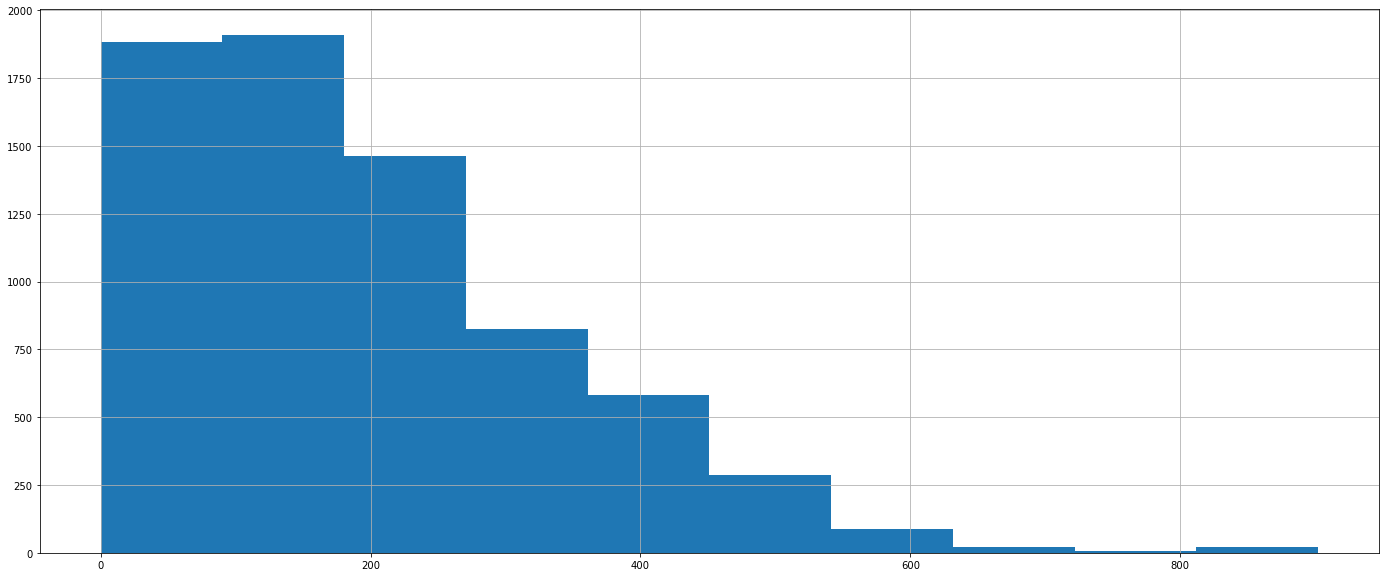

In [14]:
# Histogram of Energy
df['Energy (kcal)'].hist(figsize=(24, 10))

<AxesSubplot:>

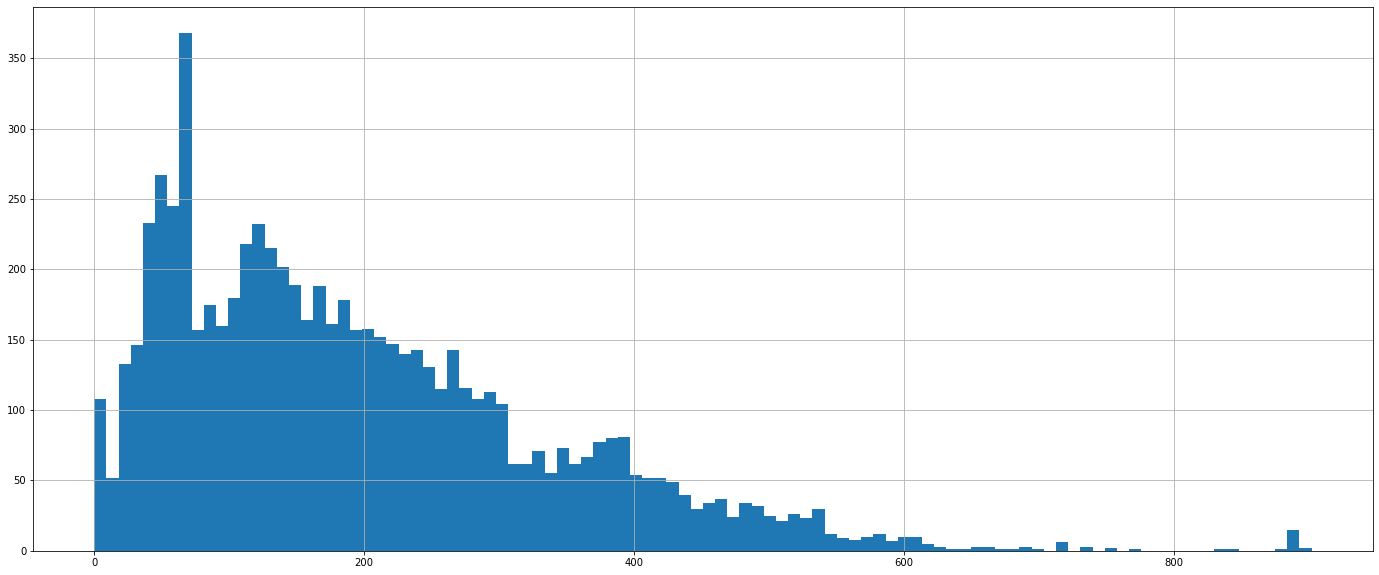

In [15]:
# Histogram of Energy divided into 100 bins
df['Energy (kcal)'].hist(figsize=(24, 10), bins=100)

<AxesSubplot:>

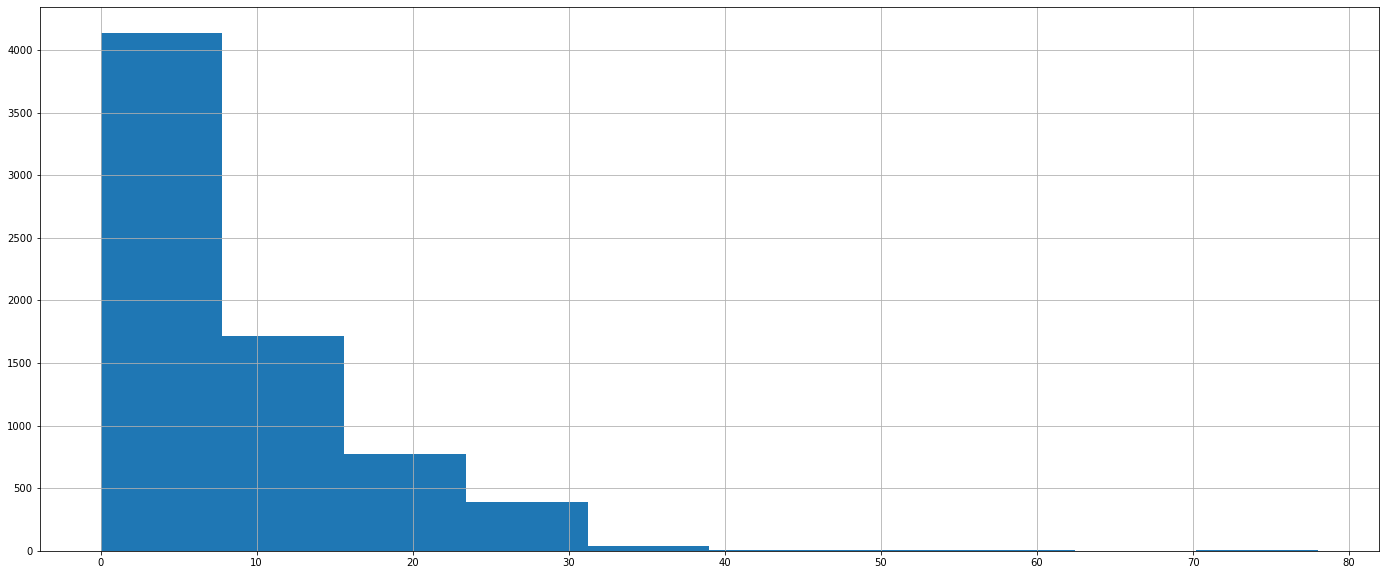

In [16]:
# Histogram of Protein divided
df['Protein (g)'].hist(figsize=(24, 10))

<AxesSubplot:>

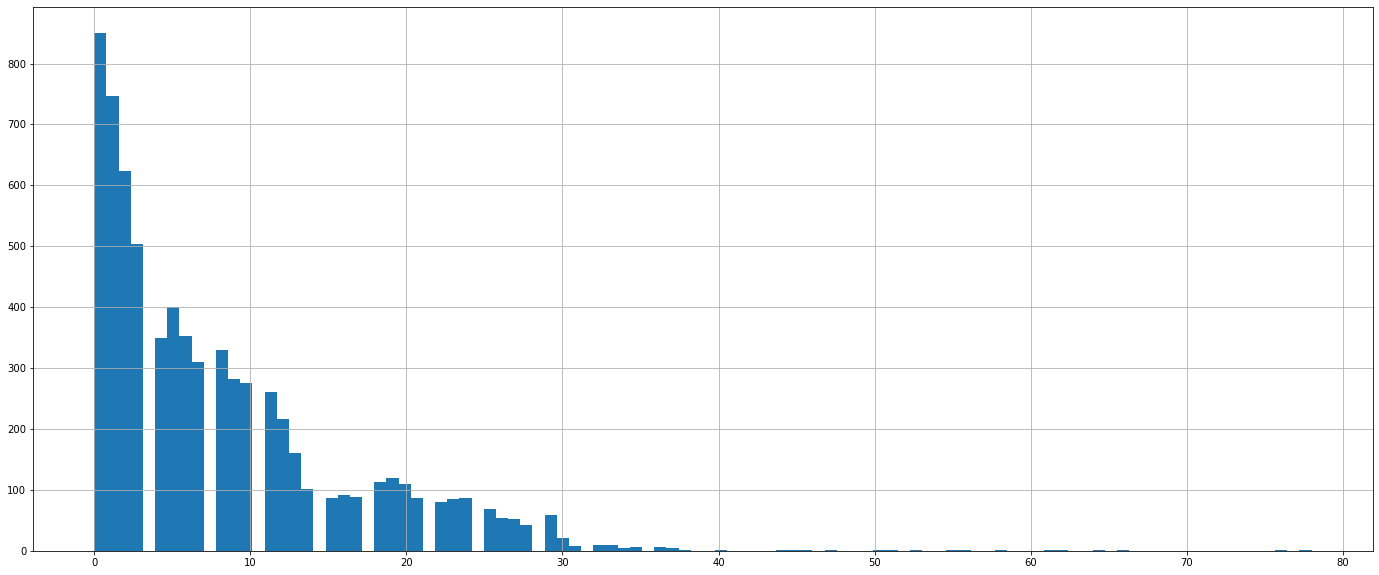

In [17]:
# Histogram of Protein divided into 100 bins
df['Protein (g)'].hist(figsize=(24, 10), bins=100)

<AxesSubplot:>

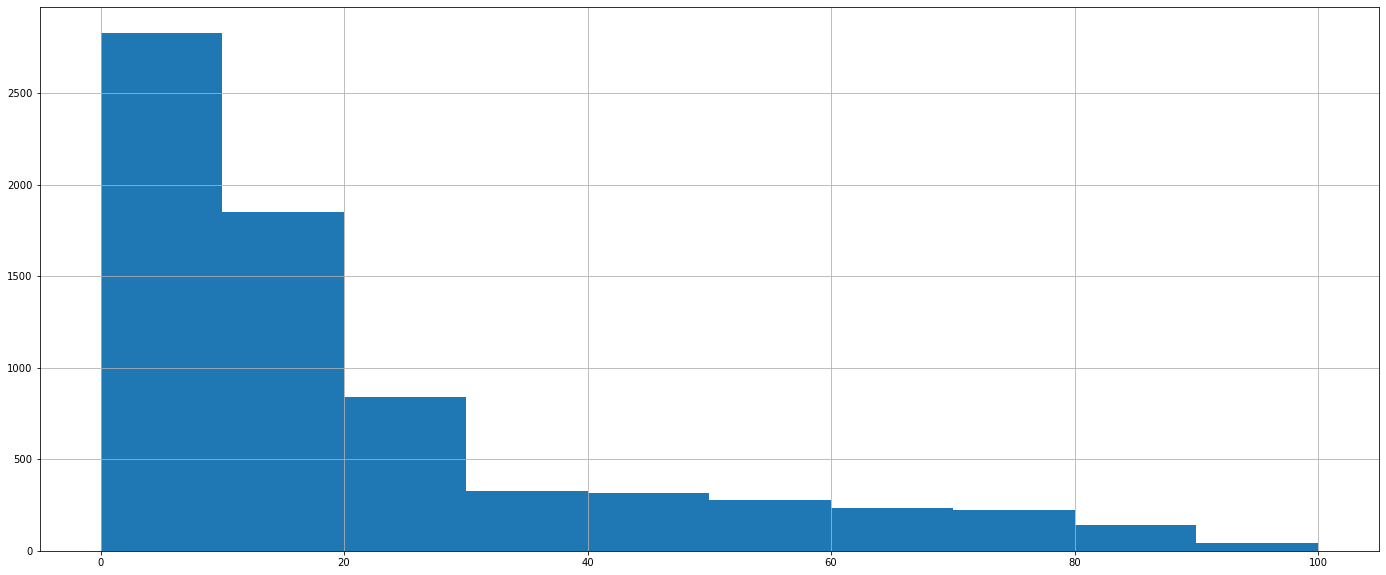

In [18]:
# Histogram of Carbohydrate divided
df['Carbohydrate (g)'].hist(figsize=(24, 10))

<AxesSubplot:>

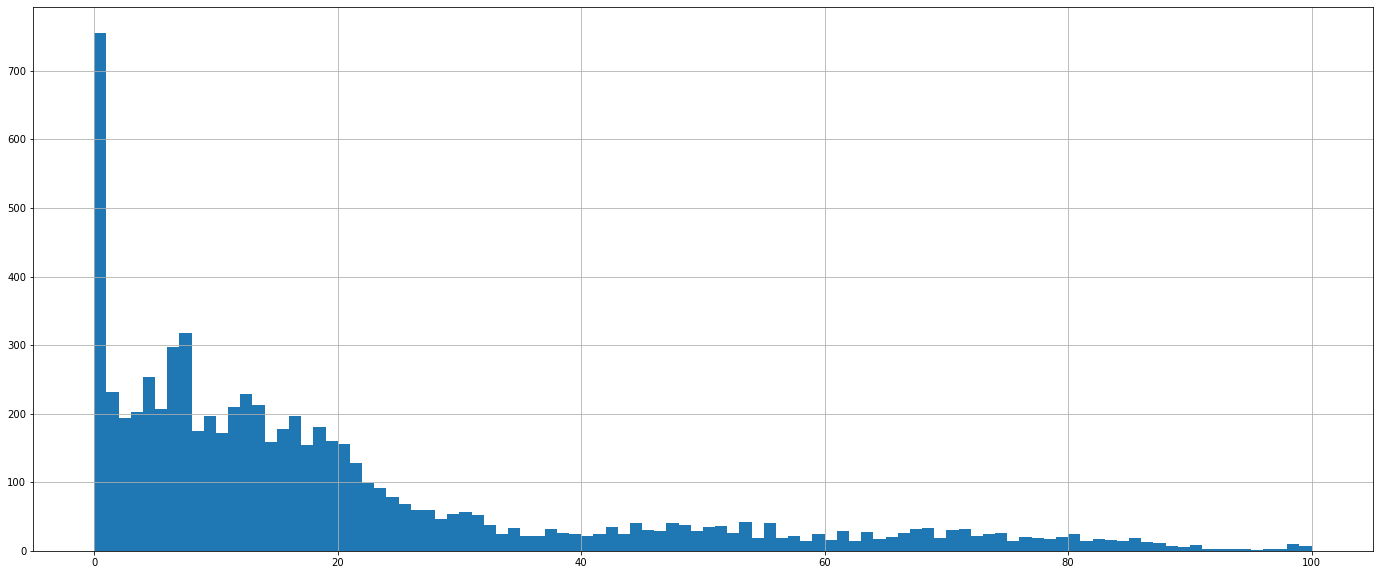

In [19]:
# Histogram of Carbohydrate divided into 100 bins
df['Carbohydrate (g)'].hist(figsize=(24, 10), bins=100)

<AxesSubplot:>

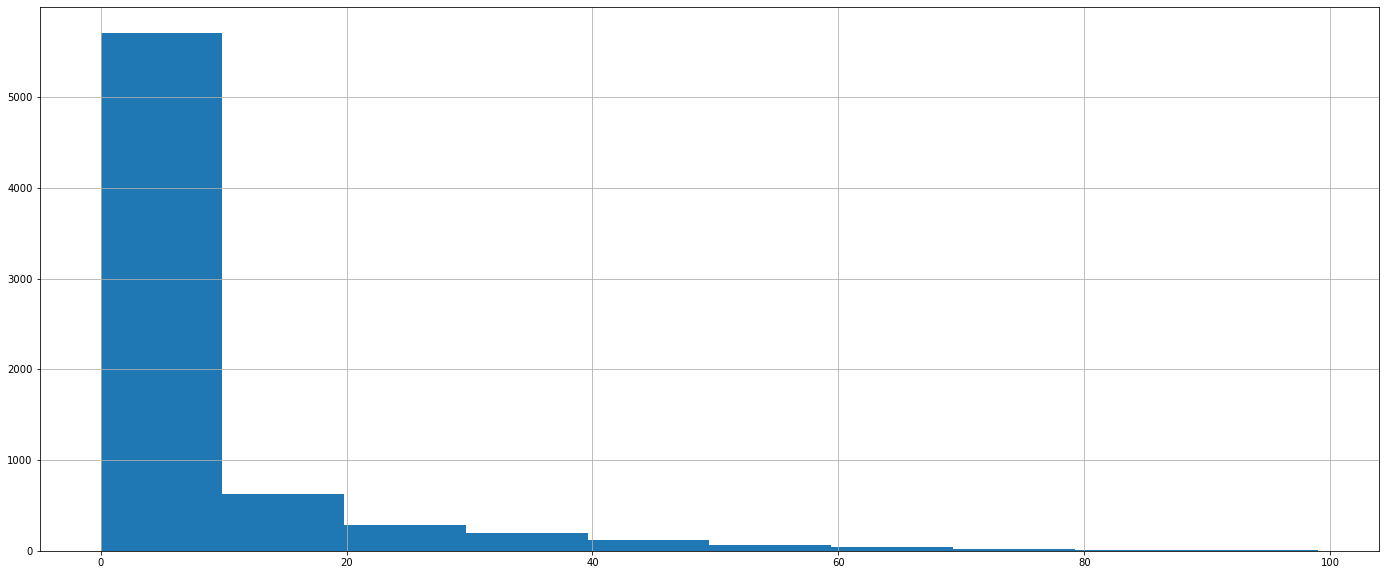

In [20]:
# Histogram of Sugars divided
df['Sugars, total\n(g)'].hist(figsize=(24, 10))

<AxesSubplot:>

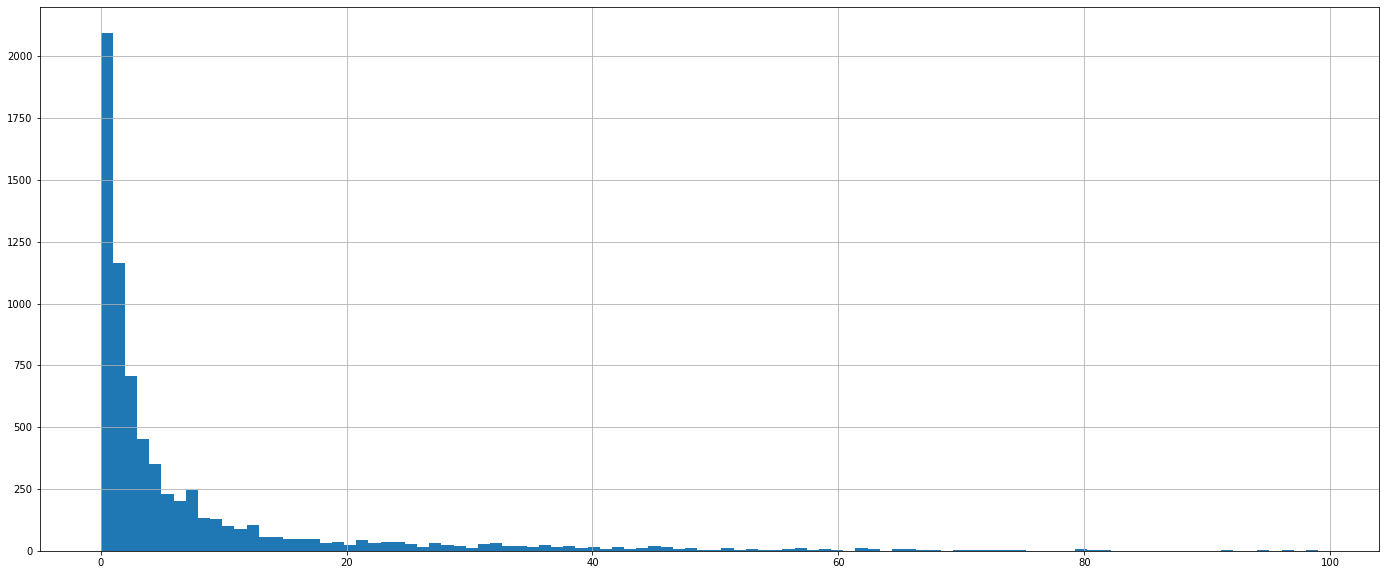

In [21]:
# Histogram of Sugars divided into 100 bins
df['Sugars, total\n(g)'].hist(figsize=(24, 10), bins=100)

<AxesSubplot:>

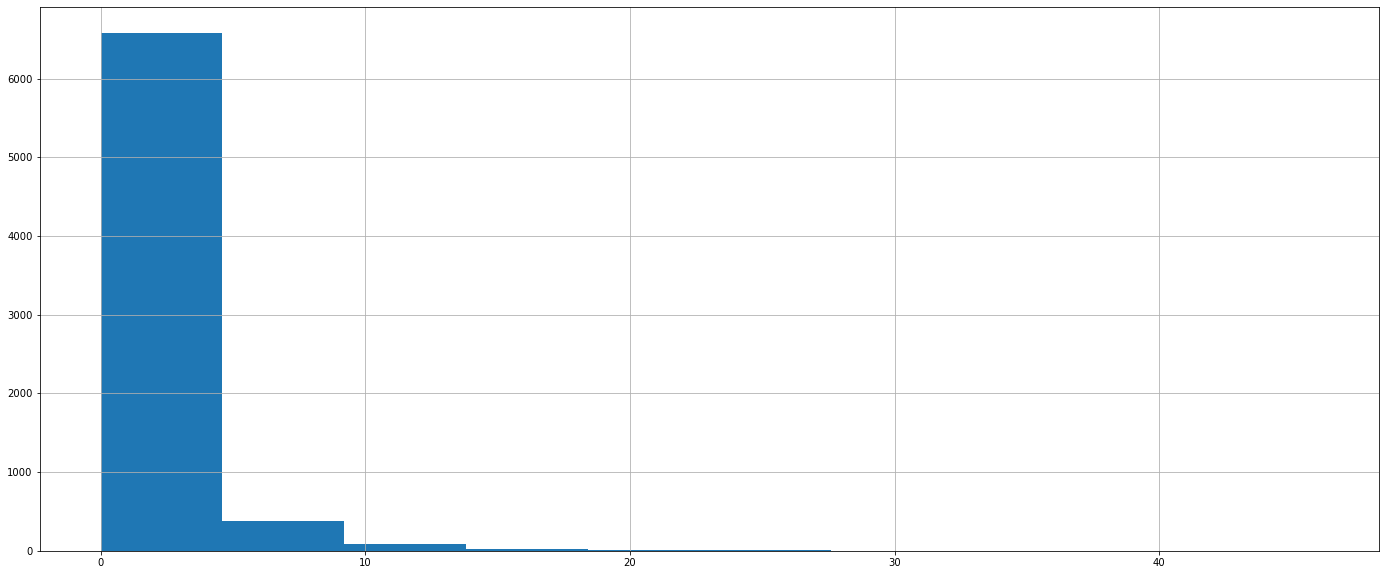

In [22]:
# Histogram of Fiber divided
df['Fiber, total dietary (g)'].hist(figsize=(24, 10))

<AxesSubplot:>

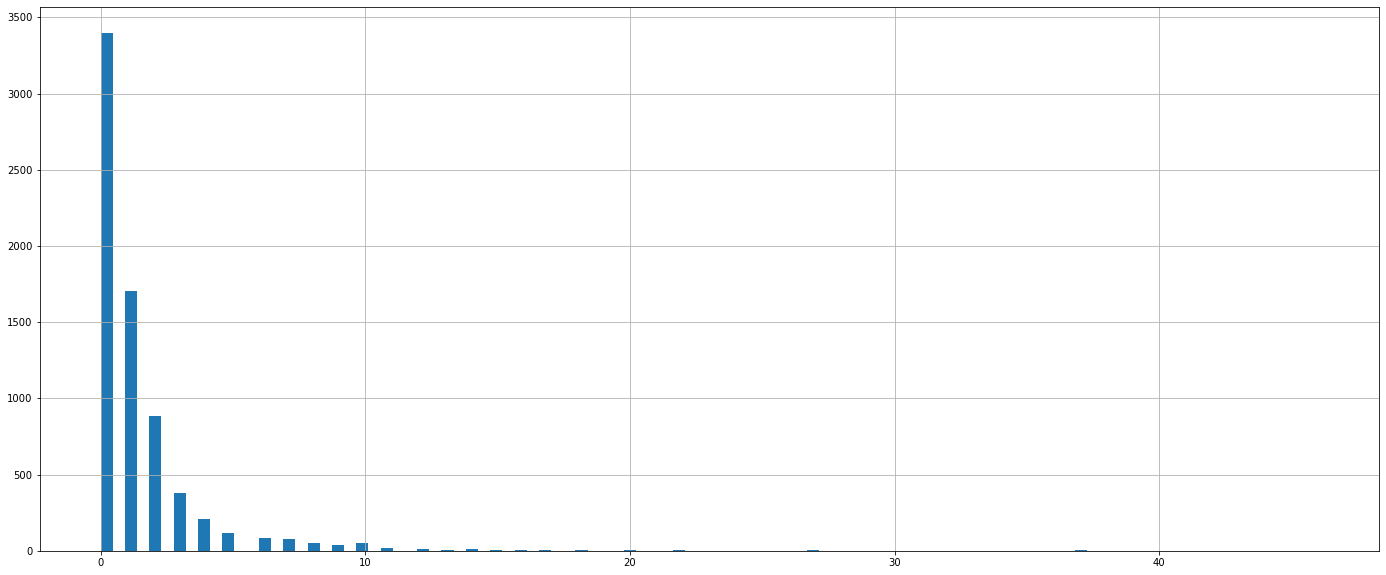

In [23]:
# Histogram of Fiber divided into 100 bins
df['Fiber, total dietary (g)'].hist(figsize=(24, 10), bins=100)

<AxesSubplot:>

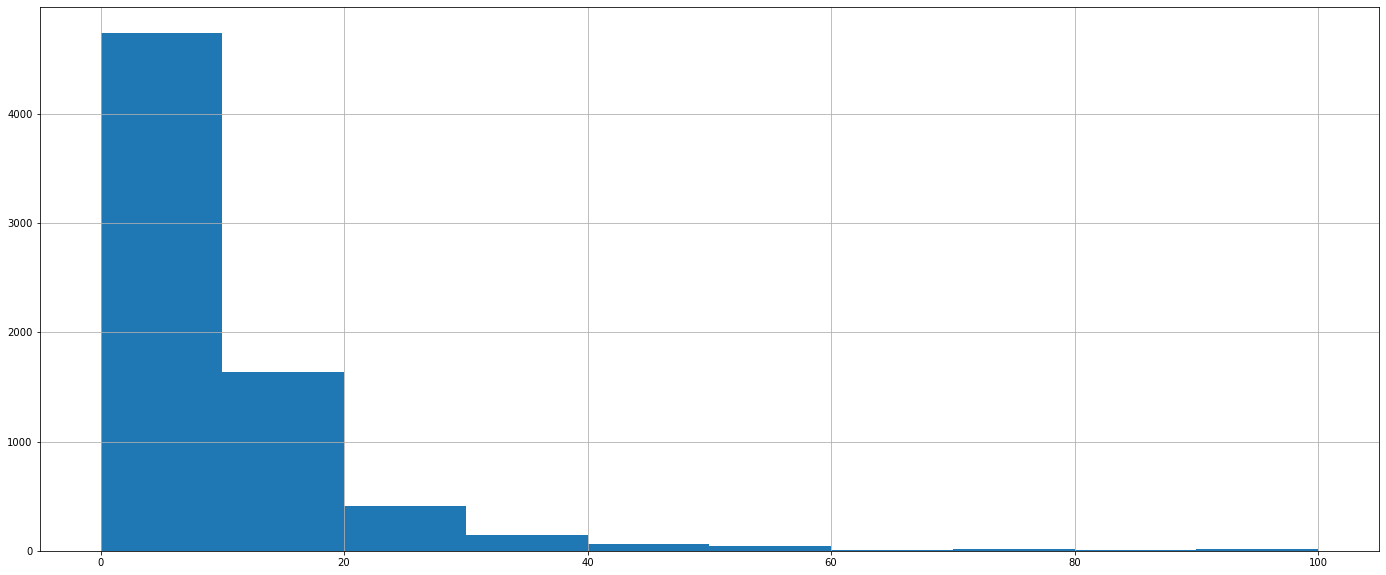

In [24]:
# Histogram of Fat divided
df['Total Fat (g)'].hist(figsize=(24, 10))

<AxesSubplot:>

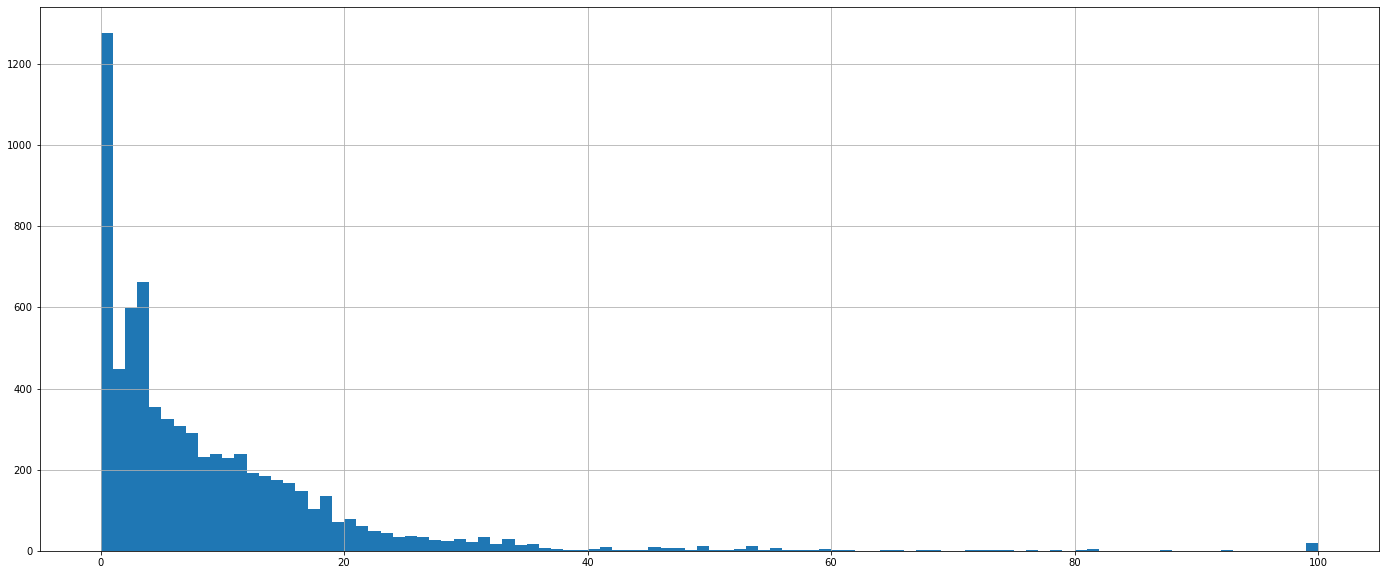

In [25]:
# Histogram of Fat divided
df['Total Fat (g)'].hist(figsize=(24, 10), bins=100)

<AxesSubplot:>

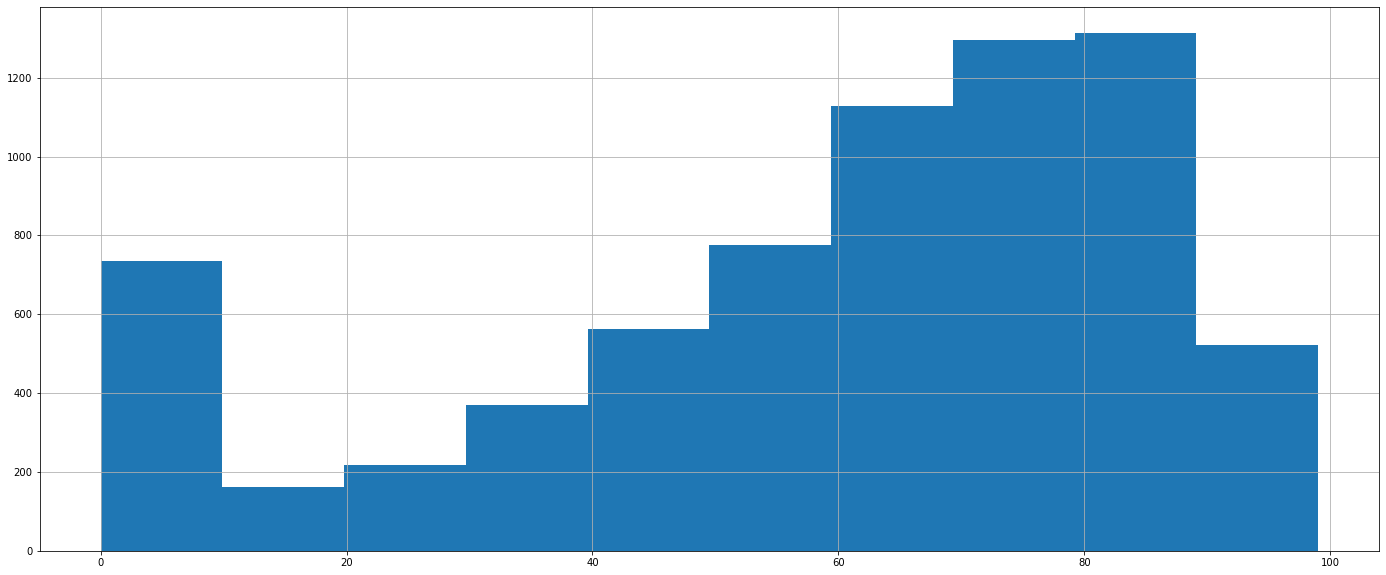

In [26]:
# Histogram of Water divided
df['Water\n(g)'].hist(figsize=(24, 10))

<AxesSubplot:>

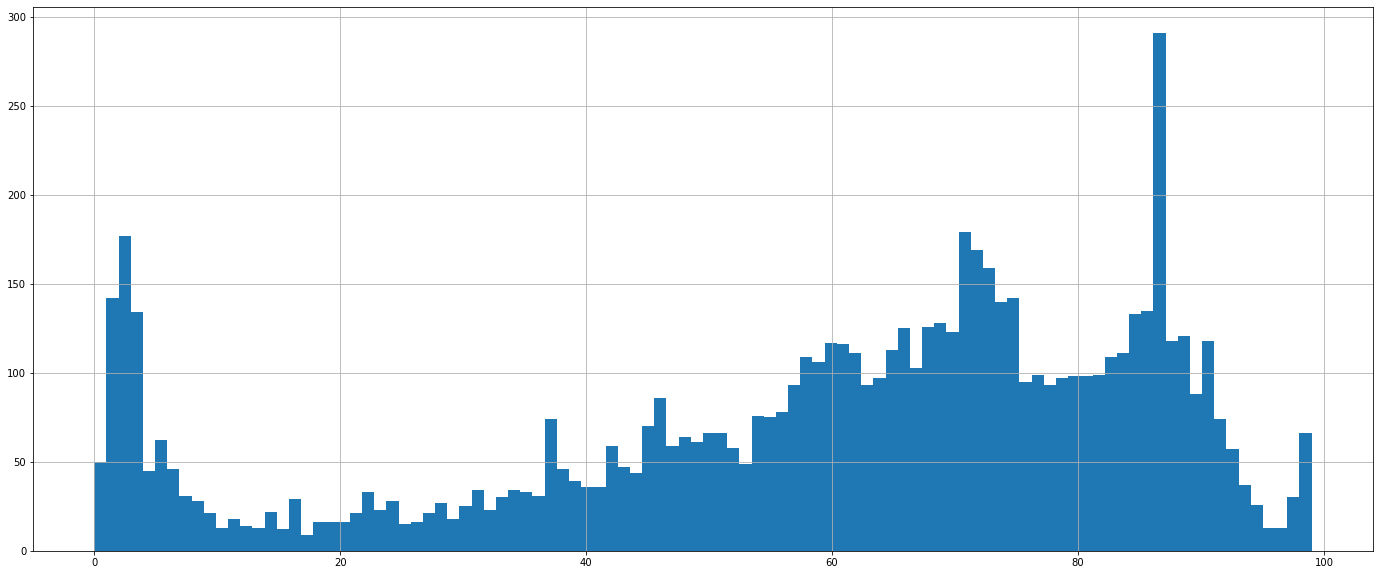

In [27]:
# Histogram of Water divided into 100 bins
df['Water\n(g)'].hist(figsize=(24, 10), bins=100)

None of the values here appear extreme enough to be excluded and may be important for differentiation 

## Statistical Tests

In [28]:
# Split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# Split validate off, 30% of what remains (24% of original df size)
# Thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  43626
validate observations:  18700
test observations:  15587


#### 1. How strong are the relationships between each of the numerical variables?

$H_0$ = Null Hypothesis - There's a significant relationship between all the nutrition categories.

$H_A$ = Alternative Hypothesis - There's not a significant relationship between all the nutrition categories.

Relationship strength between each pair of numerical variables


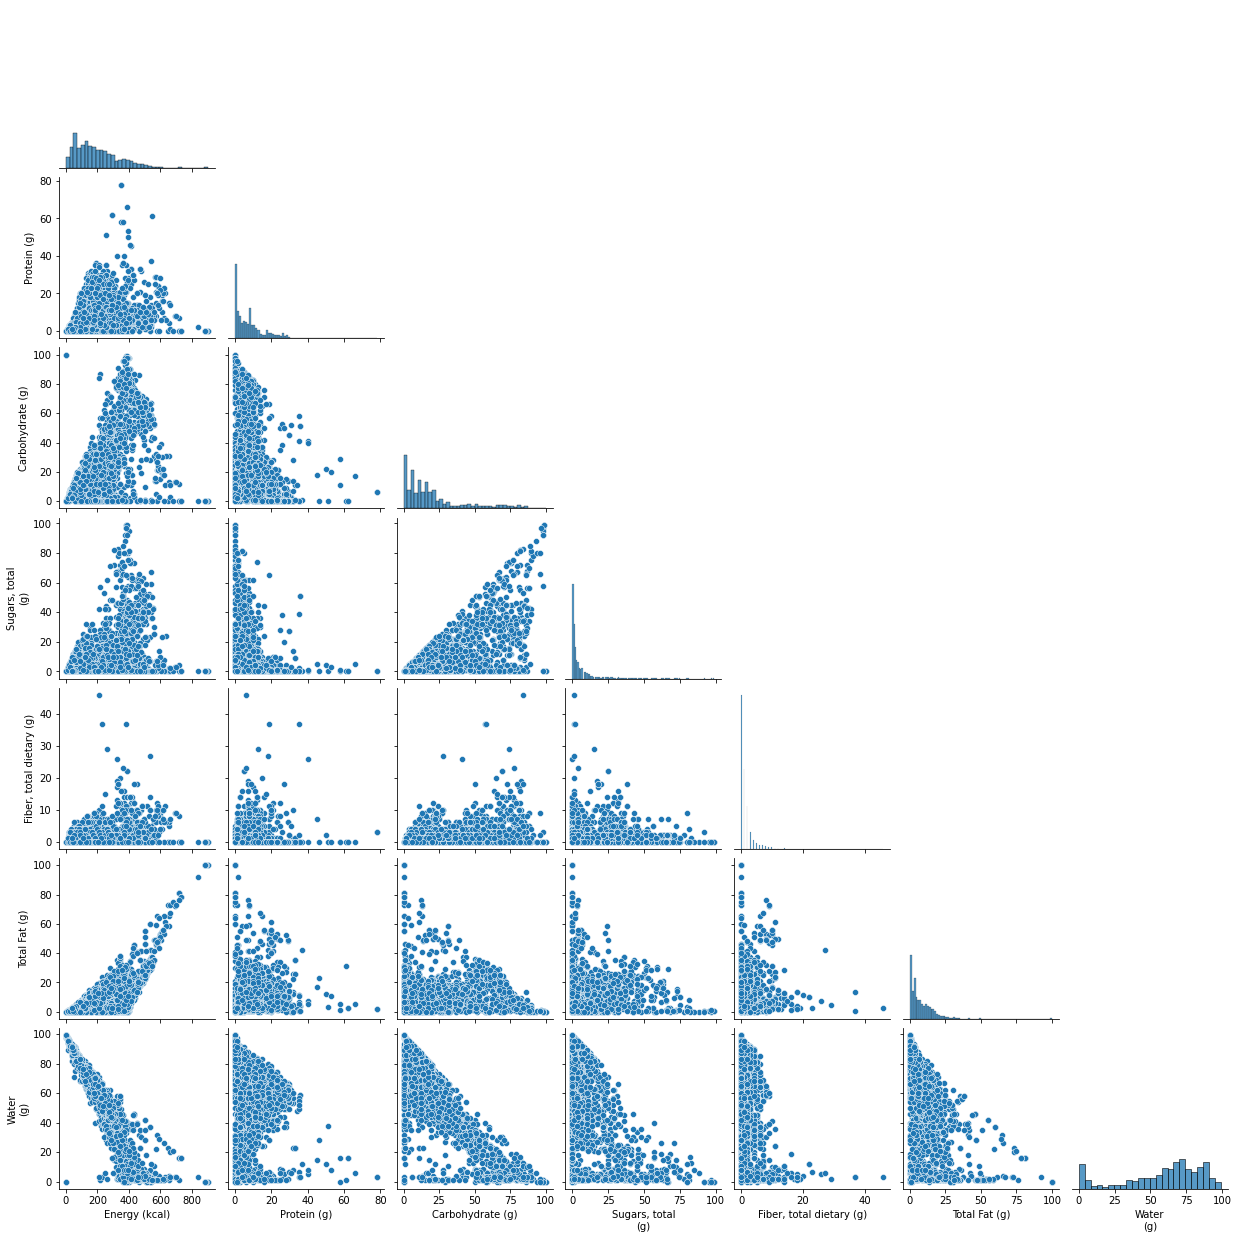

In [29]:
print("Relationship strength between each pair of numerical variables")
numerical_cols = ['Energy (kcal)', 
                'Protein (g)', 
                'Carbohydrate (g)', 
                'Sugars, total\n(g)', 
                'Fiber, total dietary (g)', 
                'Total Fat (g)', 
                'Water\n(g)']
sns.pairplot(train[numerical_cols], corner=True)
plt.show()


#### 2. What's the relationship between the items in the WWEIA Category description and the other variables?

$H_0$ = Null Hypothesis - There's a significant strong relationship between all WWEIA Category descriptions of the different food items.

$H_A$ = Alternative Hypothesis - There's not a significant strong relationship between all WWEIA Category descriptions of the different food items.

In [30]:
train

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g),Total Fat (g)'
637,14650180,Alfredo sauce with poultry,"Dips, gravies, other sauces",153,7,1,0,0,13.59,76,13
1462,26137140,"Salmon, coated, fried, made with oil",Fish,253,20,9,0,0,14.08,54,14
5474,71405019,"Potato, hash brown, from fresh, with cheese",French fries and other fried white potatoes,221,5,16,1,1,15.49,61,15
765,22201400,"Pork steak or cutlet, breaded or floured, frie...",Pork,306,21,16,1,1,16.72,43,16
1607,26305180,"Crab, canned",Shellfish,83,17,0,0,0,0.74,79,0
...,...,...,...,...,...,...,...,...,...,...,...
5653,72128223,"Turnip greens, canned, cooked, fat added",Other dark green vegetables,41,1,2,0,1,2.81,91,2
2774,32130680,"Egg omelet or scrambled egg, with cheese, toma...",Eggs and omelets,185,11,1,0,0,14.47,70,14
7012,95201500,"Nutritional powder mix, high protein (Herbalife)",Protein and nutritional powders,392,53,20,3,0,10.71,8,10
1147,25112200,"Liver paste or pate, chicken",Liver and organ meats,201,13,6,0,0,13.1,65,13


## Scale Data

In [31]:
def scale_food(train, validate, test,
                 numerical_cols = ['Energy (kcal)', 
                                  'Protein (g)', 
                                  'Carbohydrate (g)', 
                                  'Sugars, total\n(g)', 
                                  'Fiber, total dietary (g)', 
                                  'Total Fat (g)', 
                                  'Water\n(g)']):
    
    '''
    Accepts train, validate, and test as inputs from split data then returns scaled versions for each one using Robust Scaler.
    '''
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = sklearn.preprocessing.MinMaxScaler()

    scaler.fit(train[numerical_cols])
    
    train_scaled[numerical_cols] = pd.DataFrame(scaler.transform(train[numerical_cols]), columns=train[numerical_cols].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[numerical_cols] = pd.DataFrame(scaler.transform(validate[numerical_cols]), columns=validate[numerical_cols].columns.values).set_index([validate.index.values])
    
    test_scaled[numerical_cols] = pd.DataFrame(scaler.transform(test[numerical_cols]), columns=test[numerical_cols].columns.values).set_index([test.index.values])
    
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[numerical_cols], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(train_scaled[numerical_cols], bins=25, ec='black')
    plt.title('Scaled')
    
    return train_scaled, validate_scaled, test_scaled

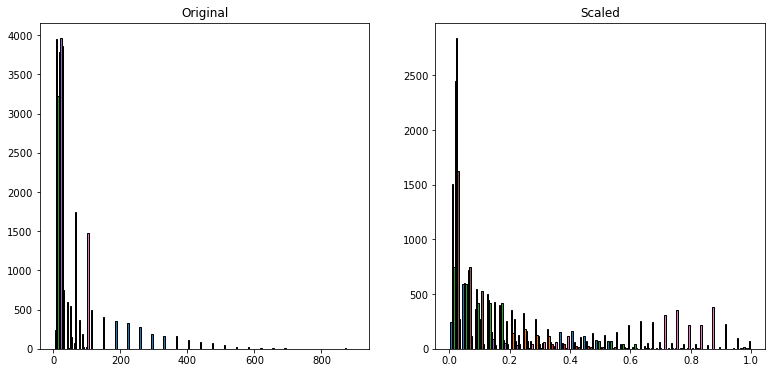

In [32]:
scaled_train, scaled_validate, scaled_test = scale_food(train, validate, test)

## Clustering Models

In [33]:
list(df.columns.values.tolist())

['Food code',
 'Main food description',
 'WWEIA Category description',
 'Energy (kcal)',
 'Protein (g)',
 'Carbohydrate (g)',
 'Sugars, total\n(g)',
 'Fiber, total dietary (g)',
 'Total Fat (g)',
 'Water\n(g)',
 "Total Fat (g)'"]

In [34]:
# Isolating numerical columns from train, validate, and test datasets
scaled_train = train[numerical_cols]

scaled_validate = validate[numerical_cols]

scaled_test = test[numerical_cols]

scaled_set = [scaled_train, scaled_validate, scaled_test]

Uses clustering model K-Means on numerical columns

In [35]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df


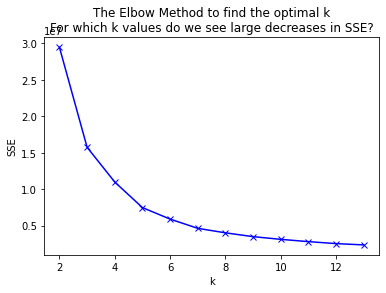

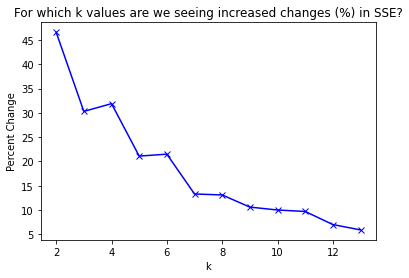

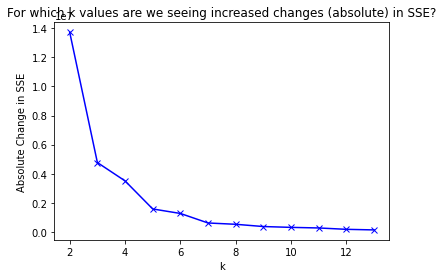

,k,sse,delta,pct_delta
0,2,2.947810e+07,13724317.0,46.6
1,3,1.575378e+07,4768653.0,30.3
2,4,1.098513e+07,3506875.0,31.9
3,5,7.478254e+06,1578765.0,21.1
4,6,5.899489e+06,1269114.0,21.5
5,7,4.630375e+06,614646.0,13.3
6,8,4.015730e+06,524526.0,13.1
7,9,3.491203e+06,369911.0,10.6
8,10,3.121292e+06,313265.0,10.0
9,11,2.808027e+06,272385.0,9.7


In [36]:
k_range = range(2,15)
cluster_name = 'area_cluster'
find_k(scaled_train, numerical_cols, k_range)

Using the elbow method it appears that the point where K appears to drop off is around 7, which is what I'll use for k going forward

In [37]:
k = 7

In [38]:
def cluster_maker(scaled_train, k, cluster_vars):
    # Creates a K-Means object with n = 7 and random state = 14
    kmeans = KMeans(n_clusters=7, random_state = 14)

    # Fits the K-Means obect the scaled training data
    kmeans.fit(scaled_train[numerical_cols])

    return kmeans

In [39]:
kmeans = cluster_maker(scaled_train, k, numerical_cols)

In [40]:
# # Makes predictions with scaled training data and adds column for clusters as 'cluster' to original train df
train['cluster'] = kmeans.predict(scaled_train[numerical_cols])
train

/var/folders/tg/c6tcjwk13mj583lxrf25k3jm0000gn/T/ipykernel_5537/2230047137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cluster'] = kmeans.predict(scaled_train[numerical_cols])


,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g),Total Fat (g)',cluster
637,14650180,Alfredo sauce with poultry,"Dips, gravies, other sauces",153,7,1,0,0,13.59,76,13,0
1462,26137140,"Salmon, coated, fried, made with oil",Fish,253,20,9,0,0,14.08,54,14,1
5474,71405019,"Potato, hash brown, from fresh, with cheese",French fries and other fried white potatoes,221,5,16,1,1,15.49,61,15,3
765,22201400,"Pork steak or cutlet, breaded or floured, frie...",Pork,306,21,16,1,1,16.72,43,16,1
1607,26305180,"Crab, canned",Shellfish,83,17,0,0,0,0.74,79,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
5653,72128223,"Turnip greens, canned, cooked, fat added",Other dark green vegetables,41,1,2,0,1,2.81,91,2,6
2774,32130680,"Egg omelet or scrambled egg, with cheese, toma...",Eggs and omelets,185,11,1,0,0,14.47,70,14,3
7012,95201500,"Nutritional powder mix, high protein (Herbalife)",Protein and nutritional powders,392,53,20,3,0,10.71,8,10,2
1147,25112200,"Liver paste or pate, chicken",Liver and organ meats,201,13,6,0,0,13.1,65,13,3


In [41]:
# get the centroids for each distinct cluster...
def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [42]:
food_centroids = get_centroids(kmeans, numerical_cols, cluster_name)

In [43]:
# label cluster for each observation in scaled_train, scaled_validate, & scaled_test

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(scaled_set)):
        clusters = pd.DataFrame(kmeans.predict(scaled_set[i][cluster_vars]), 
                            columns=[cluster_name], index=scaled_set[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        scaled_set[i] = pd.concat([scaled_set[i], clusters_centroids], axis=1)
    return scaled_set


In [44]:
# fit kmeans 
kmeans = cluster_maker(scaled_train, k, numerical_cols)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, numerical_cols, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
scaled_set = assign_clusters(kmeans, numerical_cols, cluster_name, centroid_df)


In [45]:
pd.DataFrame(scaled_set[0].groupby(['area_cluster', 'centroid_scaled_latitude', 'centroid_scaled_longitude', 
                           'centroid_age_bin'])['area_cluster'].count())


KeyError: 'centroid_scaled_latitude'

## Visualizations